In [1]:
#imports and dependancies
import pandas as pd
import numpy as np

# Import the hvPlot library
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [3]:
car_data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Total sales': [295_951, 305_412, 323_339, 359_597, 362_442],  # Percentages as floats
    'E-Commerce sales': [9_374, 10_411, 12_713, 14_935, 14_383]
}
car_data_df = pd.DataFrame(car_data, index=[2018, 2019, 2020, 2021, 2022])

In [4]:


# Create a grouped bar chart
grouped_bar_chart = car_data_df.hvplot.bar(
    x='index',  # Use 'index' to specify the index as the x-axis
    y=['Total sales', 'E-Commerce sales'],
    stacked=False,
    width=800,
    ylabel='Sales',
    title='Total Car Sales vs. E-Commerce Sales',
)

grouped_bar_chart

:Bars   [index,Variable]   (value)

In [25]:
print("E-Commerce Sales experienced a 53.4% increase over the past 5 years.")
print("Total Car sales over the past 5 years have only increased by 22.5%.")

E-Commerce Sales experienced a 53.4% increase over the past 5 years.
Total Car sales over the past 5 years have only increased by 22.5%.


In [11]:
# Sources: https://www.cars.com/articles/carscom-reports-fourth-quarter-and-full-year-2018-results-1420757480154/
# https://www.cars.com/articles/cars-reports-fourth-quarter-and-full-year-2019-results-418897/
# https://www.cars.com/articles/cars-reports-fourth-quarter-and-full-year-2020-results-432655/
# https://www.cars.com/articles/cars-reports-fourth-quarter-and-full-year-2021-results-447505/
# https://investor.cars.com/2023-02-23-CARS-Reports-Fourth-Quarter-and-Full-Year-2022-Results

cars_dot_com = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Yearly Revenue Report (in millions)': [662.1, 606.7, 547.5, 623.7, 653.9]
}
cars_dot_com_df = pd.DataFrame(cars_dot_com)

# Set the 'Year' column as the index
cars_dot_com_df = cars_dot_com_df.set_index('Year')

In [12]:
cars_dot_com_df

,Yearly Revenue Report (in millions)
Year,
2018,662.1
2019,606.7
2020,547.5
2021,623.7
2022,653.9


In [14]:
cars_dot_com_bar_chart = cars_dot_com_df.hvplot.bar(title="Cars.com Fourth Quarter Reported Revenue (in millions)")

cars_dot_com_bar_chart


:Bars   [Year]   (Yearly Revenue Report (in millions))

In [18]:
print("A 19.4% increase in revenue between 2020 and 2022")

A 19.4% increase in revenue between 2020 and 2022


In [16]:
# Set the 'Year' column as the index

# Define the number of simulations
num_simulations = 1000

# Growth rate assumptions (normal distribution)
mean_growth_rate = 0.05  # Mean growth rate
std_dev_growth_rate = 0.02  # Standard deviation of growth rates

# Perform Monte Carlo simulation
simulated_data = []
for i in range(num_simulations):
    # Generate random growth rates based on a normal distribution
    growth_rates = np.random.normal(mean_growth_rate, std_dev_growth_rate, len(cars_dot_com_df))

    # Forecast revenue for each year
    forecasted_revenue = [cars_dot_com_df['Yearly Revenue Report (in millions)'].iloc[-1] *
                          (1 + rate) for rate in growth_rates]
    
    # Append the simulated revenue to the list
    simulated_data.append(forecasted_revenue)

# Create a DataFrame from the simulated data
simulated_df = pd.DataFrame(simulated_data).transpose()

# Set the column names as simulation numbers
simulated_df.columns = [f"Simulation {i+1}" for i in range(num_simulations)]

# Display the simulated data
print(simulated_df)


   Simulation 1  Simulation 2  Simulation 3  Simulation 4  Simulation 5  \
0    687.819819    675.412283    692.081273    682.148091    698.256361   
1    686.861353    692.100435    706.145000    677.884638    678.608558   
2    695.340476    699.937282    672.885366    686.862191    676.160865   
3    697.784562    696.481808    668.676442    711.009139    660.238201   
4    693.550216    655.476553    708.131139    694.646952    687.808806   

   Simulation 6  Simulation 7  Simulation 8  Simulation 9  Simulation 10  ...  \
0    707.766949    686.135447    686.087575    690.524938     673.258716  ...   
1    686.185998    723.588350    673.049089    676.993942     682.495354  ...   
2    689.198420    699.159710    672.371094    673.092026     696.895590  ...   
3    669.117897    703.390458    701.395114    697.097773     685.175244  ...   
4    702.396677    674.342215    676.143615    672.635538     692.617882  ...   

   Simulation 991  Simulation 992  Simulation 993  Simulation 

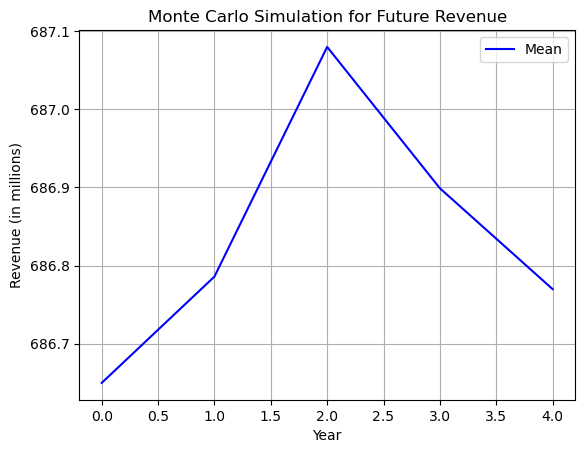

In [17]:
plt.plot(simulated_df.index, simulated_df.mean(axis=1), color='blue', label='Mean')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.title('Monte Carlo Simulation for Future Revenue')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
